In [1]:
#preamble

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyf
import os
import sarabande

In [2]:
config = {'physical_boxsize': 256,
        'Nmesh': 256,
          'ell_max': 4,
         'N_bins': 10,
         'rmin': 1e-14,
         'rmax': 128,
         'N_realizations': 1}

In [3]:
#variables 

physical_boxsize = config["physical_boxsize"] # Mpc / h
Nmesh = config["Nmesh"] 
ell_max = config["ell_max"]
nbins = config["N_bins"]
rmin = config["rmin"] # Mpc/h
rmax = config["rmax"] #Mpc/h
N_realizations = config["N_realizations"]

In [5]:
# load in data

zetas_full = np.load("4pcf_full.npy")
zetas_disconnected = np.load("4pcf_disconnected.npy")

In [6]:
#convert to 1D

r_arr = np.linspace(rmin,rmax,nbins+1)
r_lo, r_hi = r_arr[:-1], r_arr[1:]
r_av = 0.5*(r_lo+r_hi)

In [7]:
#1D plot data

def generate_1d_plot_data(ells, zeta, theory=False):
    """
    Generate the 1D plot data.
    """
    zeta_l_1d, bin_indexes,b_i = [], [], 0
    l_1,l_2,l_3 = int(ells[0]),int(ells[1]),int(ells[2])
    for b1 in range(0,nbins):
        for b2 in range(b1 + 1, nbins):
            for b3 in range(b2 + 1, nbins):
                
                value = zeta[l_1,l_2,l_3,b1,b2,b3]   
                value *= (r_av[b1] * r_av[b2] * r_av[b3])
                zeta_l_1d.append(value)
                bin_indexes.append(b_i)
                b_i += 1
                
    zeta_1d, bin_indexes = np.array(zeta_l_1d), np.array(bin_indexes)
    return [bin_indexes, zeta_1d]

/Users/toriwilliamson/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


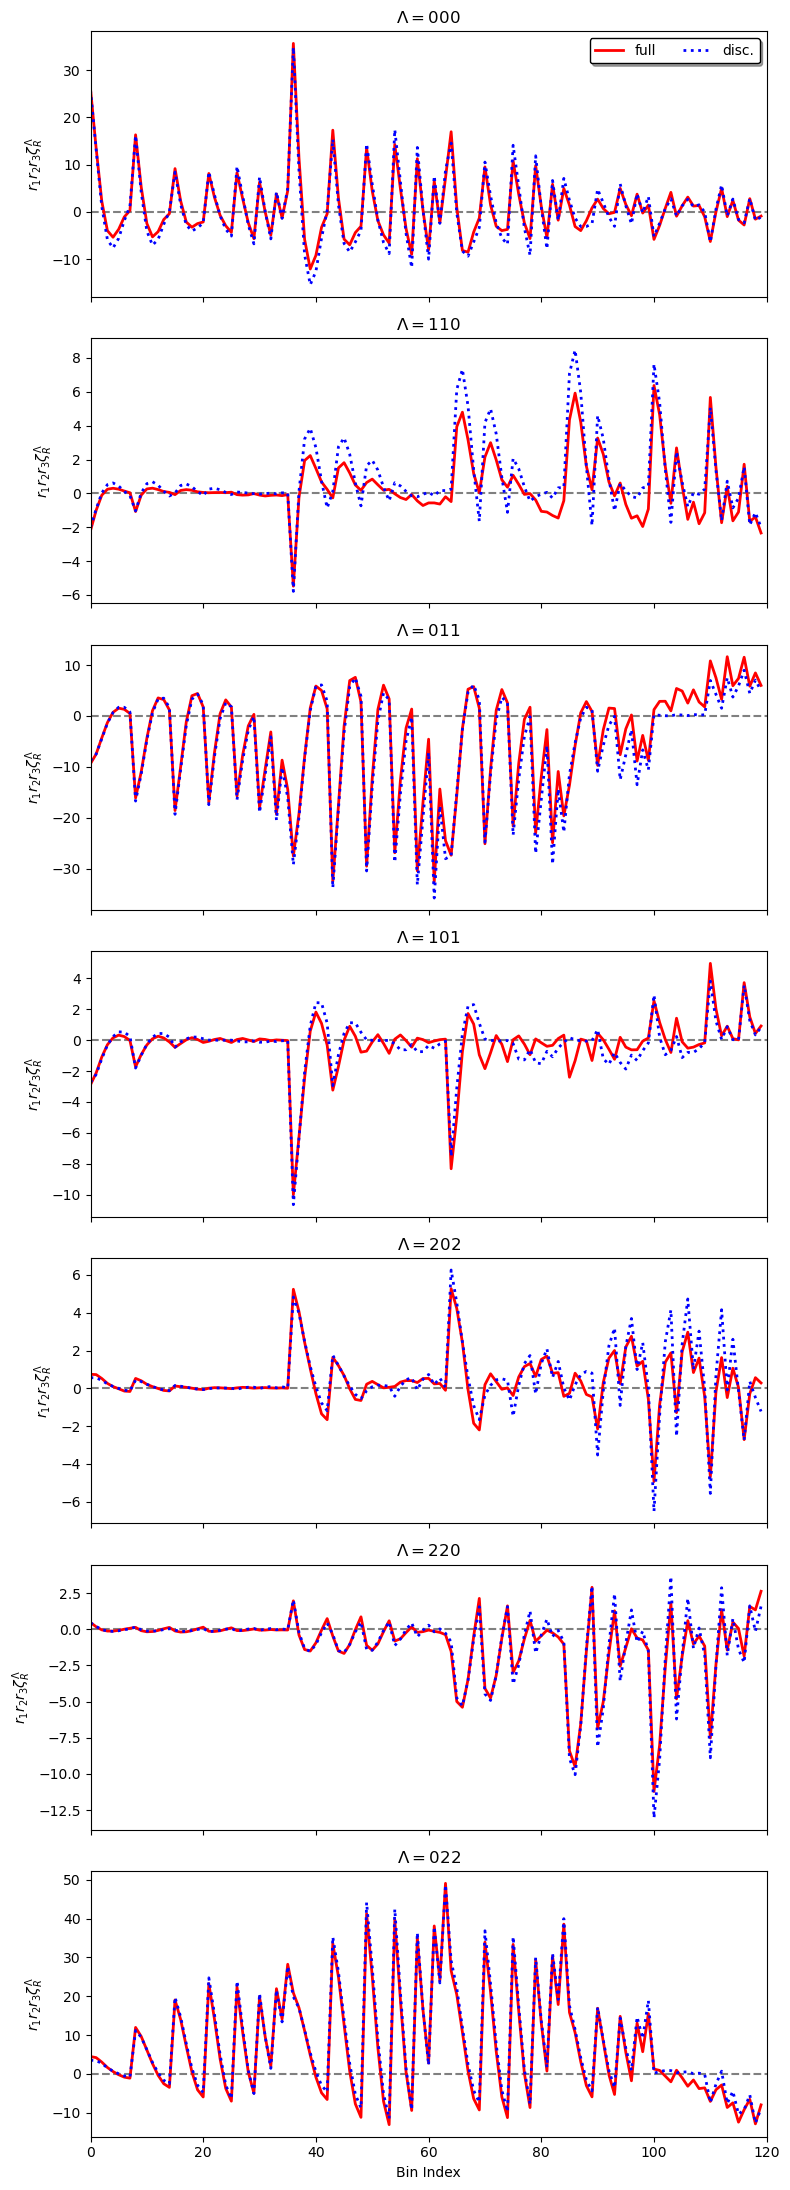

In [8]:
#Plot details
ells_list = ['000', '110', '011', '101', '202',  '220', '022']
# factor = (4 * np.pi)**(2)

f, axes = plt.subplots(len(ells_list),1, figsize=(8,8 + 2*len(ells_list)), sharex=True)
axes[-1].set_xlabel('Bin Index')

for i, ells in enumerate(ells_list):

    bin_indices, zeta_full = generate_1d_plot_data(ells, zetas_full, theory=False)
    
    axes[i].hlines(y = 0, xmin = 0, xmax = 120, color="gray", linestyle="--")
    axes[i].set_xlim(0, 120)
#     axes[i].set_ylim(-np.max(np.abs(zeta_full[0]))*1.25, np.max(np.abs(zeta_full[0]))*1.25)

#Full
    axes[i].plot(bin_indices, zeta_full, color='red', linestyle="-", label='full', linewidth=2)

#Disconnected
    bin_indices, zeta_disc = generate_1d_plot_data(ells, zetas_disconnected, theory=False)

    
    axes[i].plot(bin_indices, zeta_disc, color="blue", linestyle=":", label='disc.', linewidth=2)
    
    axes[i].set_ylabel("$r_1 r_2 r_3 \\zeta^{\\Lambda}_R$"); axes[i].set_title(f"$\\Lambda = {ells}$")
    

    axes[0].legend(ncol=3, edgecolor="black", shadow=True)
    plt.tight_layout()

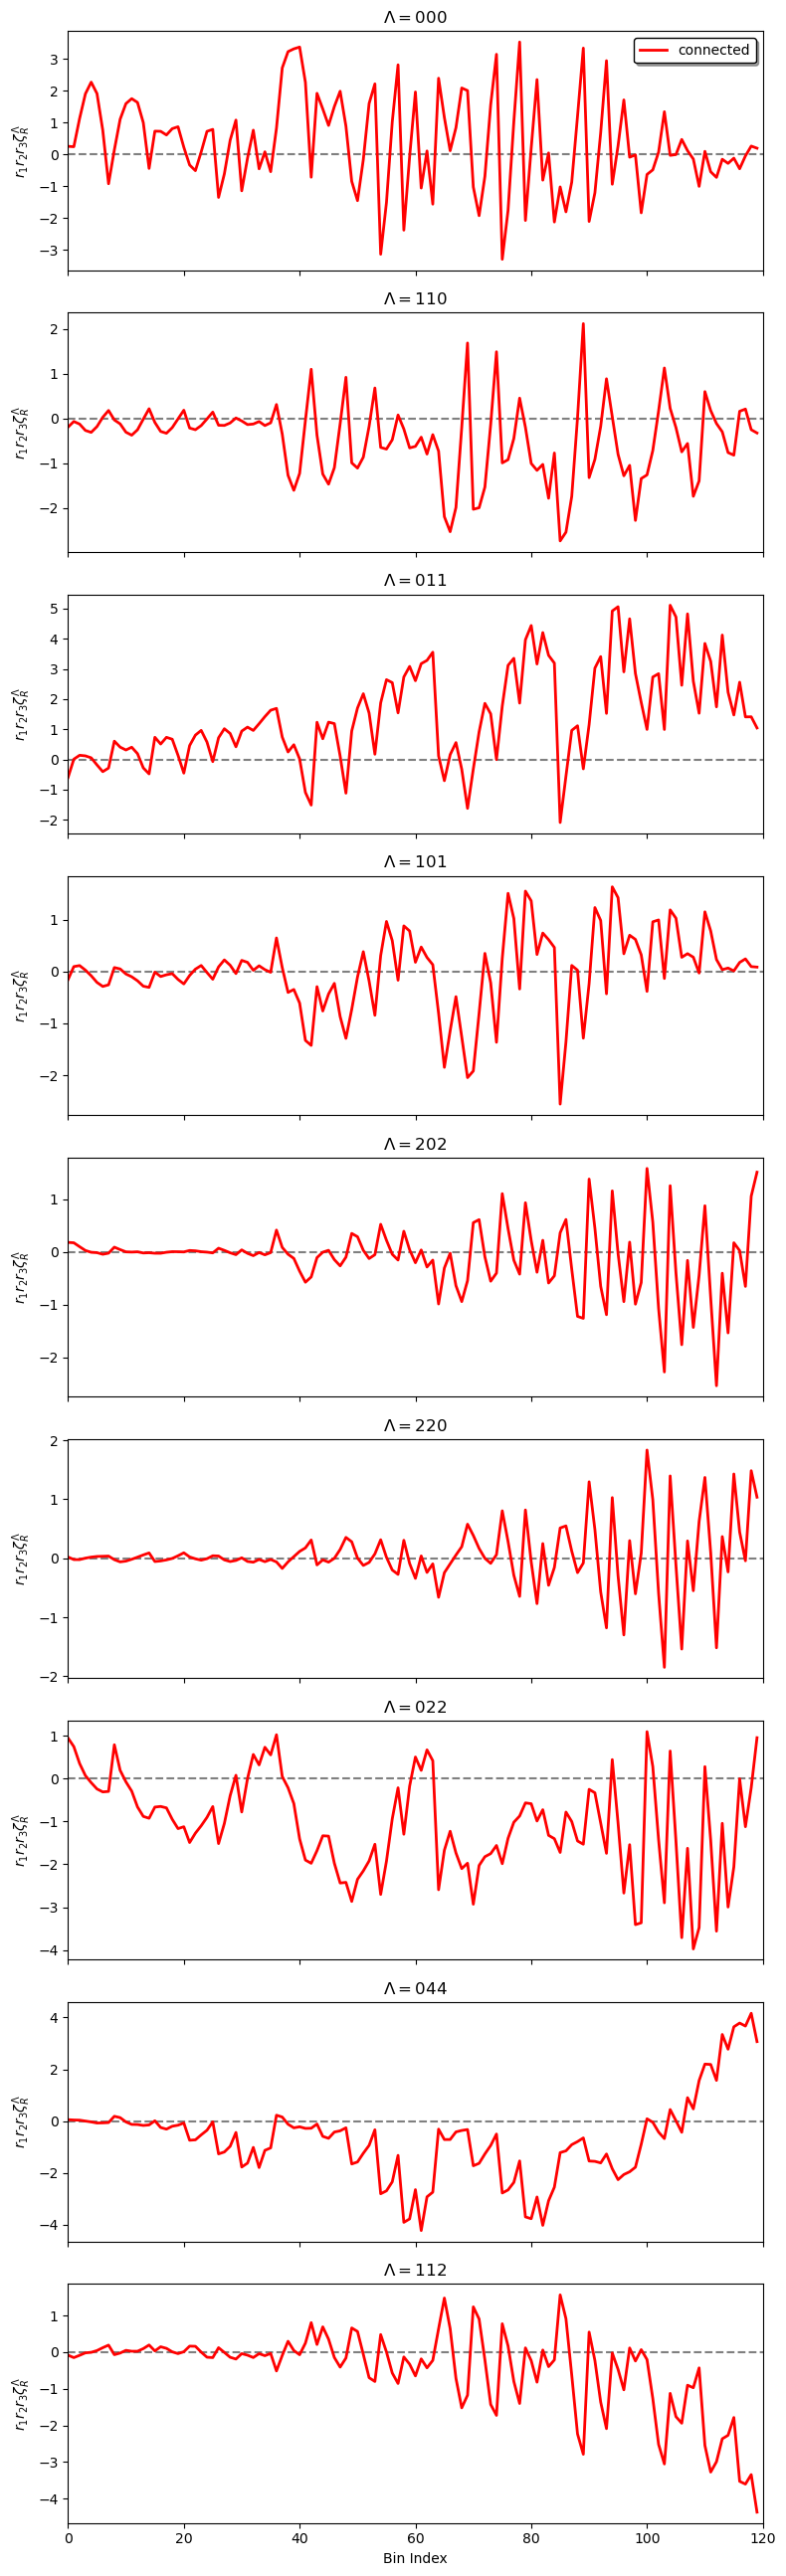

In [9]:
#Plot details
ells_list = ['000', '110', '011', '101', '202',  '220', '022', '044', '112']
# factor = (4 * np.pi)**(2)

f, axes = plt.subplots(len(ells_list),1, figsize=(8,8 + 2*len(ells_list)), sharex=True)
axes[-1].set_xlabel('Bin Index')

for i, ells in enumerate(ells_list):

    bin_indices, zeta_connected = generate_1d_plot_data(ells, zetas_full - zetas_disconnected, theory=False)
    
    axes[i].hlines(y = 0, xmin = 0, xmax = 120, color="gray", linestyle="--")
    axes[i].set_xlim(0, 120)
#     axes[i].set_ylim(-np.max(np.abs(zeta_full[0]))*1.25, np.max(np.abs(zeta_full[0]))*1.25)

#Full
    axes[i].plot(bin_indices, zeta_connected, color='red', linestyle="-", label='connected', linewidth=2)

#Disconnected
#     bin_indices, zeta_disc = generate_1d_plot_data(ells, zetas_disconnected, theory=False)

    
#     axes[i].plot(bin_indices, zeta_disc, color="blue", linestyle=":", label='disc.', linewidth=2)
    
    axes[i].set_ylabel("$r_1 r_2 r_3 \\zeta^{\\Lambda}_R$"); axes[i].set_title(f"$\\Lambda = {ells}$")
    

    axes[0].legend(ncol=3, edgecolor="black", shadow=True)
    plt.tight_layout()